In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
class NeuralNetwork():
    def __init__(self,inpLayers,opLayers,hiddenLayers):
        self.inpLayers = inpLayers #4
        self.opLayers = opLayers #1
        self.hiddenLayers = hiddenLayers #10

        self.W1 = np.random.randn(self.inpLayers, self.hiddenLayers)
        self.W2 = np.random.randn(self.hiddenLayers, self.opLayers) 
        
    def forward(self, X):
        self.z = np.dot(X, self.W1) 
        self.z2 = self.sigmoidal(self.z) 
        self.z3 = np.dot(self.z2, self.W2) 
        output = self.sigmoidal(self.z3)
        return output
        
    def sigmoidal(self, s, deriv=False):
        if (deriv == True):
            return s * (1 - s)
        return 1/(1 + np.exp(-s))
    
    def backward(self, X, y, output):
        self.outputErr = y - output
        self.outputDelta = self.outputErr * self.sigmoidal(output, deriv=True)
        
        self.z2Err = self.outputDelta.dot(self.W2.T) 
        self.z2Delta = self.z2Err * self.sigmoidal(self.z2, deriv=True) 
        
        self.W1 += X.T.dot(self.z2Delta) 
        self.W2 += self.z2.T.dot(self.outputDelta) 
        
    def train(self, X, y):
        output = self.forward(X)
        self.backward(X, y, output)
        


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
def bpnnDriver(inp,actOut,numberOfHiddenLayers,numOfEpoch,minErr):
    numOfInpLayers,numOfOpLayers = np.size(inp,axis = 1),np.size(actOut,axis = 1)
    NN = NeuralNetwork(numOfInpLayers,numOfOpLayers,numberOfHiddenLayers)
    epoch,allErr = [],[]
    prev = -1
    for i in range(numOfEpoch):
        epoch.append(i+1)
        currentErr = np.mean(np.square(actOut - NN.forward(inp)))
        allErr.append(currentErr)
        NN.train(inp,actOut)
        if currentErr < minErr:
            break
        prev = currentErr
    #print("Input: " ,X)
    #print("Error: ",str(np.mean(np.square(y - NN.forward(X)))))
    #print("\n")
    #print("Predicted Output: ",str(NN.forward(X)))
    return epoch,allErr

In [0]:
def plotErrGraph(xData,yData,forTrust):
    plt.plot(xData,yData)
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.title(forTrust)
    plt.show()

[[0.66666667 1.         0.66666667 0.83333333]
 [0.33333333 0.44444444 1.         0.83333333]
 [1.         0.44444444 0.33333333 1.        ]]
[[0.92]
 [0.86]
 [0.89]]


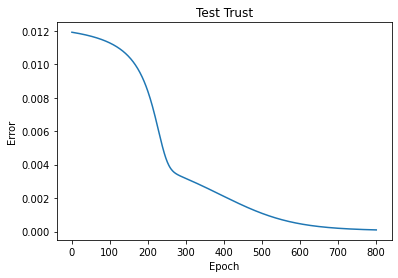

Starting error =  0.011908363375704079
Ending error =  9.994514506217755e-05


In [0]:
X = np.array(([2, 9,2,5], [1,4,3,5], [3,4,1, 6]), dtype=float)
y = np.array(([0.92], [0.86], [0.89]), dtype=float)
X = X/np.amax(X, axis=0) 
print(X)
print(y)
forEpoch,errList = bpnnDriver(X,y,10,1000,0.0001)
plotErrGraph(forEpoch,errList,"Test Trust")
print("Starting error = ",errList[0])
print("Ending error = ",errList[-1])

[[ 1.  1.  1.  1.]
 [ 1. -1. -1. -1.]]
[[ 1.]
 [-1.]]


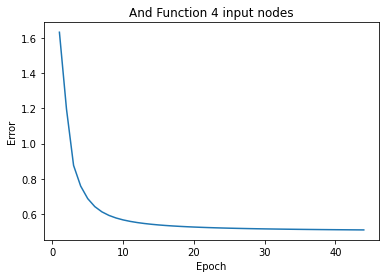

Starting error =  1.6320292803091214
Ending error =  0.5099741262579456


In [0]:
X = np.array(([1,1,1,1], [1,-1,-1,-1]), dtype=float)
y = np.array(([1],[-1]), dtype=float)
print(X)
print(y)
forEpoch,errList = bpnnDriver(X,y,10,1000,0.51)
plotErrGraph(forEpoch,errList,"And Function 4 input nodes")
print("Starting error = ",errList[0])
print("Ending error = ",errList[-1])

[[ 1.  1.]
 [ 1. -1.]
 [-1.  1.]
 [-1. -1.]]
[[ 1.]
 [-1.]
 [-1.]
 [-1.]]


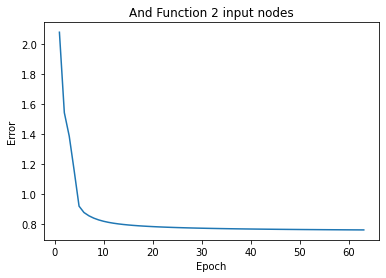

Starting error =  2.077575250191555
Ending error =  0.7599958795730445


In [0]:
X = np.array(([1,1], [1,-1],[-1,1], [-1,-1]), dtype=float)
y = np.array(([1],[-1],[-1],[-1]), dtype=float)
print(X)
print(y)
forEpoch,errList = bpnnDriver(X,y,10,1000,0.76)
plotErrGraph(forEpoch,errList,"And Function 2 input nodes")
print("Starting error = ",errList[0])
print("Ending error = ",errList[-1])